In [ ]:

from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

n_colors = 64

In [2]:
china = load_sample_image("china.jpg")
china_org = china.copy()
china = np.array(china, dtype=np.float64) / 255

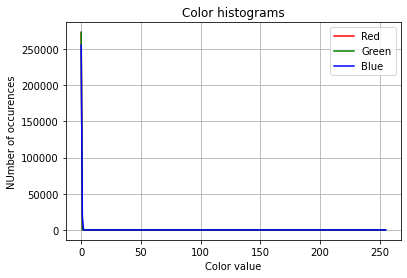

In [ ]:
from imhist import imhist, imcdf

r_hist = imhist(china[:, :, 0])
g_hist = imhist(china[:, :, 1])
b_hist = imhist(china[:, :, 2])

plt.figure(num=1)
plt.plot(np.arange(256), r_hist, 'r', label="Red")
plt.plot(np.arange(256), g_hist, color="green", label="Green")
plt.plot(np.arange(256), b_hist, color="blue", label="Blue")
plt.title("Color histograms")
plt.ylabel("NUmber of occurences")
plt.xlabel("Color value")
plt.grid(which='both')
plt.legend()
plt.show()

In [7]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.302s.


In [8]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 0.009s.


In [9]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)
done in 0.014s.


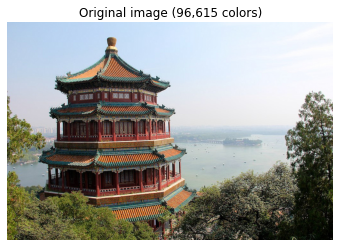

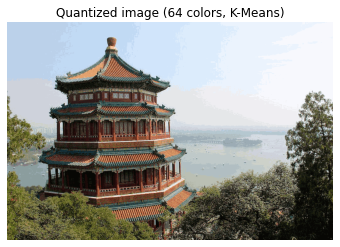

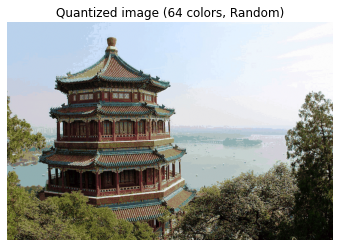

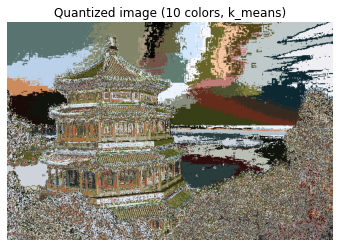

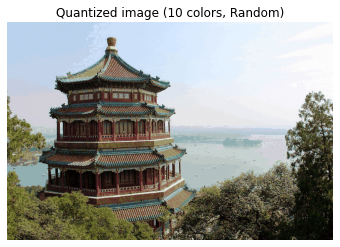

In [12]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({10} colors, k_means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels_random, w, h))
plt.show()

#10 colors using random codebook
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({10} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()